In [1]:
using Pkg
Pkg.activate("../..")
# Pkg.instantiate()

  Activating project at `c:\Simulations\EpistemicMessagePassing`


In [2]:
using LinearAlgebra
using ForwardDiff: jacobian

da = 0.05
as = 0:da:1
n = length(as)
function muAbw(A_bar)
    fA = zeros(n,n)
    for j = 1:n
        for k = 1:n
            A = [as[j] as[k]; 1-as[j] 1-as[k]]
            fA[j,k] = exp.( x_bar'*diag(A'*log.(A .+ eps())) + (A*x_bar)'*(log_c_bar - log.(A_bar*x_bar .+ eps()) ) )
        end
    end
    
    return fA ./ sum(fA)
end

function mean(p)
    X = Matrix{Vector}(undef, n, n)
    for j = 1:n
        for k = 1:n
            X[j,k] = [as[j], as[k]]
        end
    end
    a_bar = sum(p.*X)
    return [a_bar[1] a_bar[2]; 1-a_bar[1] 1-a_bar[2]]
end

mean (generic function with 1 method)

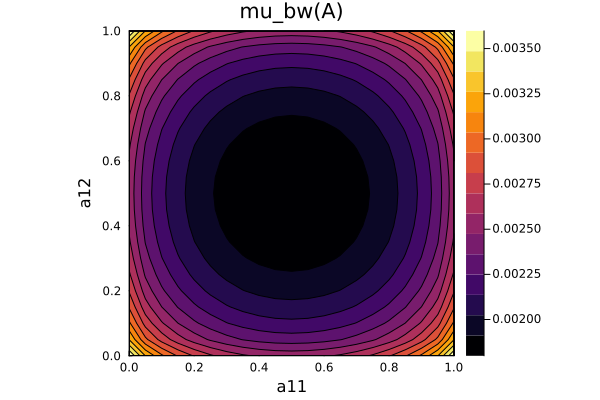

In [3]:
using Plots; gr()

B_fw = 2*ones(2, 2)
x_bar = [0.5, 0.5]
log_c_bar = log.([0.5, 0.5])

K = 5
A_bar = [0.5 0.5; 0.5 0.5]
mu = muAbw(A_bar)

plt = plot(as,
           as,
           mu',
           st=:contour,
           fill=true,
           dpi=100,
           aspect_ratio=:equal, 
           xlim=(0,1), 
           ylim=(0,1), 
           xlabel="a11",
           ylabel="a12",
           title="mu_bw(A)")
